<a href="https://colab.research.google.com/github/Hoangthang017/CS114.K21/blob/master/FaceMask_LR/FaceMask_LR_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Demo**

##**Mount Drive**

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Import thư viện cần dùng**

In [62]:
from google.colab.patches import cv2_imshow
import pickle
import cv2
import numpy as np

##**Load model**

In [63]:
# Load model
file_model =  open('/content/drive/My Drive/CS114/FaceMask/FaceMask_LogicticsRegression/Model_LR/FaceDataset.pkl', 'rb') 
Model_LR = pickle.load(file_model)

##**Load tool nhận diện khuôn mặt**

In [64]:
# load tool nhận nhận khuôn mặt của openCV
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/CS114/FaceMask/FaceMask_LogicticsRegression/Model_LR/haarcascade_frontalface_default.xml')

##**Hàm dự đoán các khuôn mặt đeo khẩu trang**

In [65]:
def Predict_FaceMask(img):
  # Dùng tool cv2 để cắt các khuôn mặt từ ảnh 
  faces = face_cascade.detectMultiScale(img, 1.3, 5)

  # Kiểm tra xem có khuôn mặt nào được cắt ra không
  if (len(faces) != 0):

    # vòng lặp cắt nhiều khuôn mặt trong ảnh 
    for (x,y,w,h) in faces:

      # Cắt mặt từ các thông số trả về từ tool cv2
      face = img[y:y+h,x:x+w]

      # pre process Face
      face = cv2.resize(face,(32,32)).flatten()
      face = np.array(face).reshape(1,-1)

      # Dự đoán 
      result = Model_LR.predict(face)

      # Lấy label từ kết quả dự đoán
      if (result == 0):

        label = "without_mask"

        # Giá trị màu đỏ 
        color = (0, 0, 255)
      else:

        label = "mask"

        # Giá trị màu xanh
        color = (0,255,0)

      # Vẽ khung quanh khuôn mặt nhận dạng được
      cv2.rectangle(img,(x,y),(x+w,y+h),color,2)

      # Ghi chữ trên khung nhận diện được 
      cv2.putText(img, label, (x, y - 10),
				cv2.FONT_HERSHEY_SIMPLEX, 0.45,color, 2)
  else:
    print("\n\n-------------------Tool Không nhận diện được khuôn mặt!!!------------------\n\n")
  # show hình ảnh được load 
  cv2_imshow(img)

##**Tiến hành demo**


###**Demo chân dung một người đeo khẩu trang**

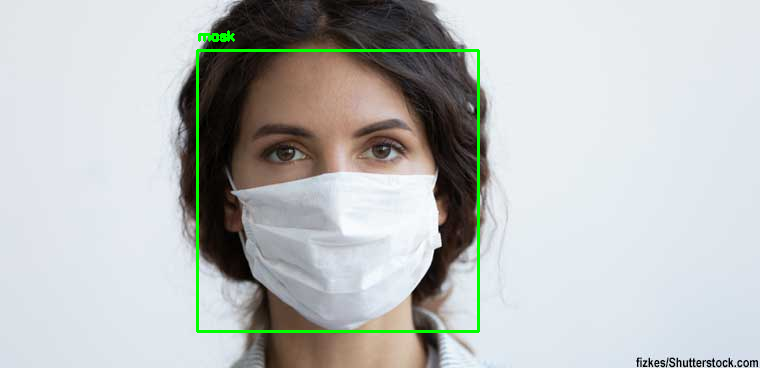

In [66]:
# Load hình 
img = cv2.imread("/content/example (5).jpg")

# Dự đoán
Predict_FaceMask(img)

###**Demo chân dung một người không đeo khẩu trang**

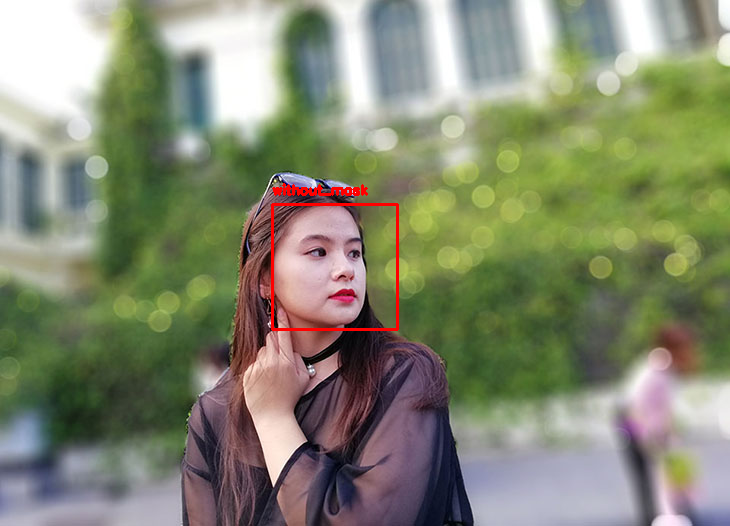

In [67]:
# Load hình 
img = cv2.imread("/content/img2.jpg")

# Dự đoán
Predict_FaceMask(img)

###**Demo tool không nhận diện được khuôn mặt**



-------------------Tool Không nhận diện được khuôn mặt!!!------------------




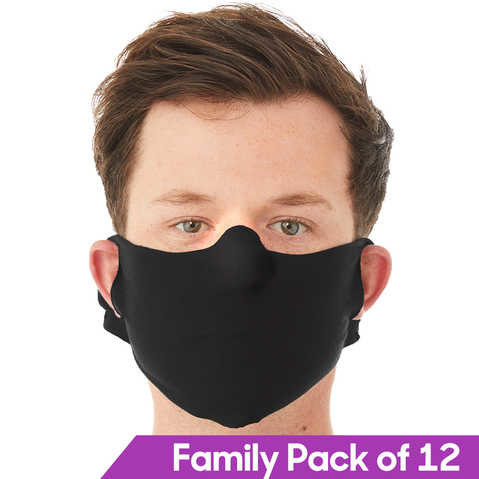

In [68]:
# Load hình 
img = cv2.imread("/content/example (1).jpg")

# Dự đoán
Predict_FaceMask(img)

###**Demo model trên ảnh tool không nhận diện được khuôn mặt**

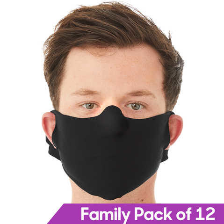

-------------------------------Mask-------------------------------


In [69]:
# Load hình 
face = cv2.imread("/content/example (1).jpg")

cv2_imshow(cv2.resize(face,(224,224)))

face = cv2.resize(face,(32,32)).flatten()
face = np.array(face).reshape(1,-1)

result = Model_LR.predict(face)

if (result == 0 ):
  print("-------------------------------Wihtout_Mask-------------------------------")
else:
  print("-------------------------------Mask-------------------------------")


###**Demo ảnh có nhiều người**

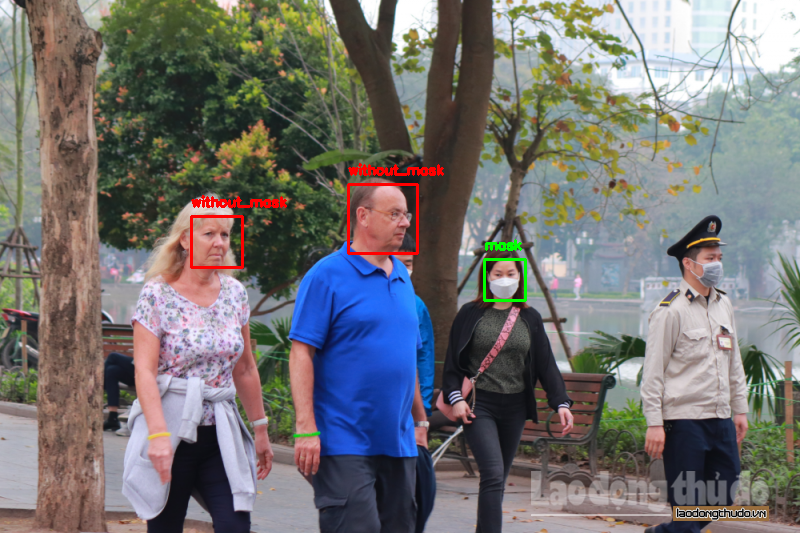

In [70]:
# Load hình 
img = cv2.imread("/content/img_predict.png")

# Dự đoán
Predict_FaceMask(img)